In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as ny



In [141]:
df = pd.read_csv('df_train.csv')

In [143]:
df

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-06-20,237000.0,3,7,False,120.77390,False,False,False,1,False,True,6,2
1,2015-04-20,1328000.0,5,9,True,310.29602,True,True,False,3,False,True,4,4
2,2014-08-13,790500.0,4,9,False,311.22505,False,False,False,2,True,False,8,4
3,2015-04-08,431000.0,4,9,False,282.42512,False,False,False,2,True,False,4,2
4,2015-02-11,199000.0,3,7,True,162.58025,False,False,False,2,True,True,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14100,2015-03-23,300000.0,3,7,True,134.70935,False,False,False,1,True,True,3,2
14101,2014-05-16,375000.0,4,9,False,259.19937,False,False,False,2,True,False,5,1
14102,2014-08-25,235000.0,3,7,False,112.41263,False,False,False,1,False,True,8,1
14103,2015-04-30,270950.0,2,6,False,72.46434,False,False,False,1,False,True,4,1


In [145]:
df.head()


,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-06-20,237000.0,3,7,False,120.77390,False,False,False,1,False,True,6,2
1,2015-04-20,1328000.0,5,9,True,310.29602,True,True,False,3,False,True,4,4
2,2014-08-13,790500.0,4,9,False,311.22505,False,False,False,2,True,False,8,4
3,2015-04-08,431000.0,4,9,False,282.42512,False,False,False,2,True,False,4,2
4,2015-02-11,199000.0,3,7,True,162.58025,False,False,False,2,True,True,2,2


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14105 entries, 0 to 14104
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               14105 non-null  object 
 1   price              14105 non-null  float64
 2   bedrooms           14105 non-null  int64  
 3   grade              14105 non-null  int64  
 4   has_basement       14105 non-null  bool   
 5   living_in_m2       14105 non-null  float64
 6   renovated          14105 non-null  bool   
 7   nice_view          14105 non-null  bool   
 8   perfect_condition  14105 non-null  bool   
 9   real_bathrooms     14105 non-null  int64  
 10  has_lavatory       14105 non-null  bool   
 11  single_floor       14105 non-null  bool   
 12  month              14105 non-null  int64  
 13  quartile_zone      14105 non-null  int64  
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 964.3+ KB


## Performing Simple Linear Regression
Here we'll seperate houses by the amount of bedrooms and then compare their prices to the quality of the construction.\
Then we'll use bedrooms to determine the group with the largest sample size and also compare the price to the living space
    
    Grade as X Axis (Grade being the quality of the houses)
    Price as Y Axis

In [150]:
bedrooms = df['bedrooms']
bedrooms.value_counts()

bedrooms
3    6550
4    4425
2    1853
5     952
6     162
1     129
7      26
0       8
Name: count, dtype: int64

In [153]:
sgl = [1]
two2= [2]
tre3 = [3]
four4 = [4]
five5 = [5]


In [155]:
# Creating datasets that only contain specific bedroom values
singletrue = (df['bedrooms'].isin(sgl))
twotrue = (df['bedrooms'].isin(two2))
threetrue = (df['bedrooms'].isin(tre3))
fourtrue = (df['bedrooms'].isin(four4))
fivetrue = (df['bedrooms'].isin(five5))





In [157]:
singlef = df.loc[singletrue,['date', 'price','living_in_m2','grade']]
twof = df.loc[twotrue,['date', 'price','living_in_m2','grade']]
threef = df.loc[threetrue,['date','price','living_in_m2','grade']]
fourf = df.loc[fourtrue,['date','price','living_in_m2','grade']]
fivef = df.loc[fivetrue,['date', 'price','living_in_m2','grade']]


In [160]:
singlef['date'] = pd.to_datetime(singlef.date)
twof['date'] = pd.to_datetime(twof.date)
threef['date'] = pd.to_datetime(threef.date)
fourf['date'] = pd.to_datetime(fourf.date)
fivef['date'] = pd.to_datetime(fivef.date)



In [162]:

x1 = singlef['grade']
y1 = singlef['price']

x2 = twof['grade']
y2 = twof['price']

x3 = threef['grade']
y3 = threef['price']

x4 = fourf['grade']
y4 = fourf['price']

x5 = fivef['grade']
y5 = fivef['price']


Plotting to analyze the data

Text(0, 0.5, 'Price of House')

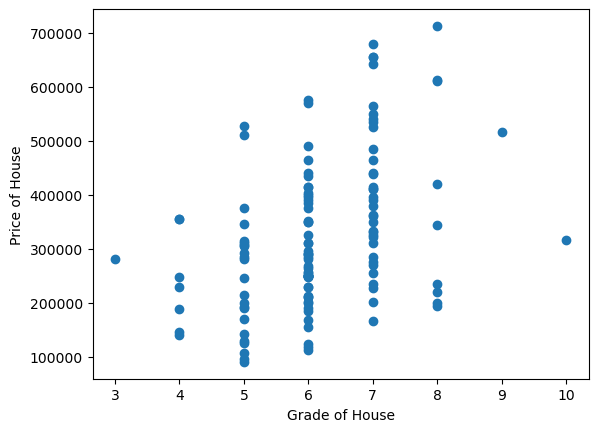

In [165]:
plt.scatter(x1,y1)
plt.xlabel('Grade of House')
plt.ylabel('Price of House')

Text(0, 0.5, 'Price of House')

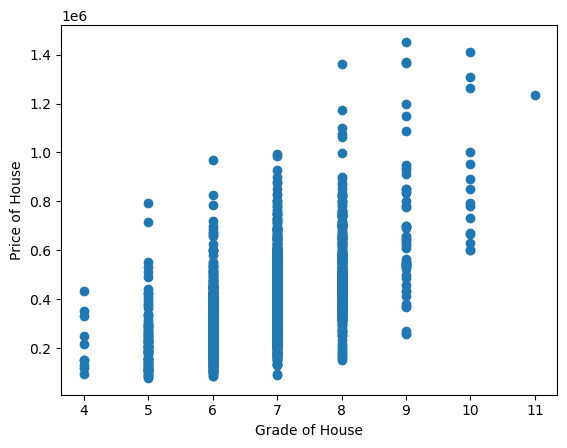

In [167]:
plt.scatter(x2,y2)
plt.xlabel('Grade of House')
plt.ylabel('Price of House')

Text(0, 0.5, 'Price of House')

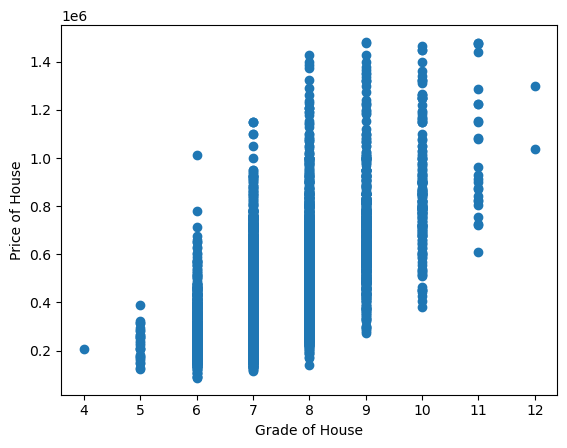

In [169]:
plt.scatter(x3,y3)
plt.xlabel('Grade of House')
plt.ylabel('Price of House')

Text(0, 0.5, 'Price of House')

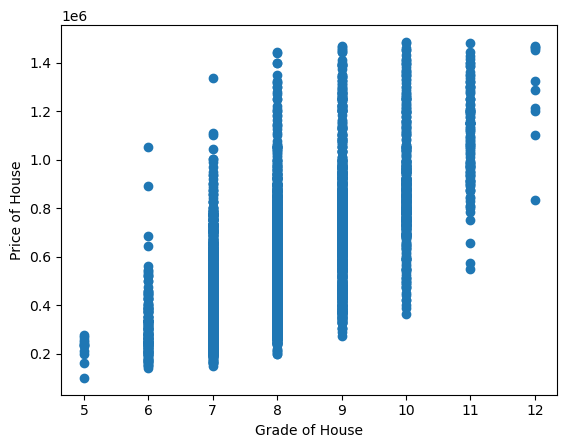

In [171]:
plt.scatter(x4,y4)
plt.xlabel('Grade of House')
plt.ylabel('Price of House')

Text(0, 0.5, 'Price of House')

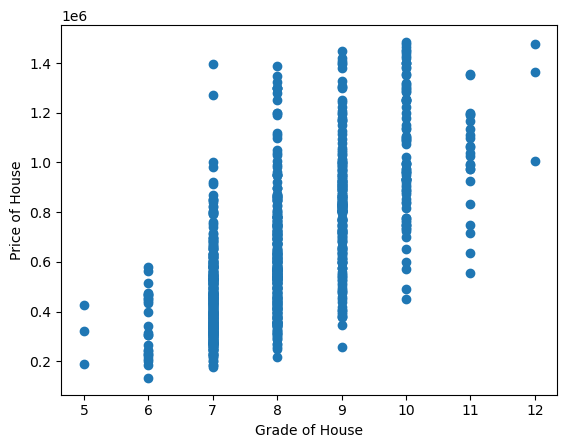

In [173]:
plt.scatter(x5,y5)
plt.xlabel('Grade of House')
plt.ylabel('Price of House')

There is a clear relationship between the Grade of the house and the price so, lets create a linear regression for the model that has the largest sample size. \ This would be the 3 bedrooms set

In [176]:
x = x3
y = y3


In [178]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 34)


In [180]:
x_train = ny.array(x_train).reshape(-1,1)
x_test = ny.array(x_test).reshape(-1,1)


In [182]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [184]:
c = lr.intercept_
m = lr.coef_


In [186]:
c

-592934.6372383147

In [188]:
m

array([139975.7786886])

In [190]:
y_pred_train = lr.predict(x_train)

Text(0, 0.5, 'Price of House')

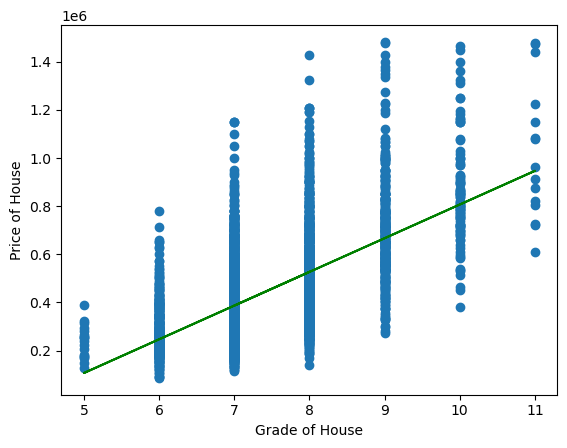

In [192]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred_train, color = 'green')
plt.xlabel('Grade of House')
plt.ylabel('Price of House')


Using the Test Model Now

Text(0, 0.5, 'Price of House')

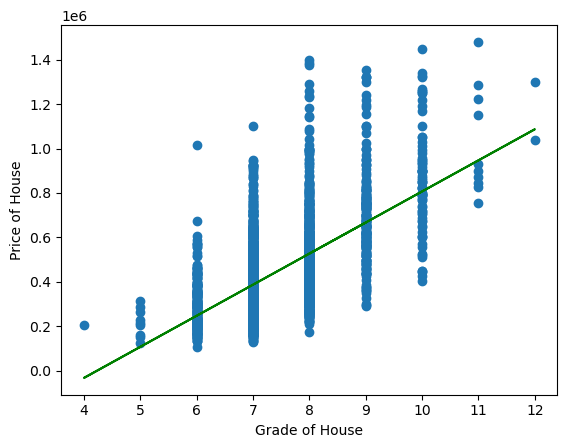

In [195]:
y_pred_test = lr.predict(x_test)

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test, color = 'green')
plt.xlabel('Grade of House')
plt.ylabel('Price of House')


In [197]:
x_test.shape

(2620, 1)

In [199]:
x_train.shape

(3930, 1)

So there is a clear positive correlation between the quality of the house and the price.

Prices increase as the grade does consistently, however our R squared does not collaborate this as it is closer to 0 than to 1

    

In [202]:
score = lr.score(x_train,y_train)
score

0.3695265009486681

Lets try a linear regression with the living space

In [205]:
x = threef['living_in_m2']

In [207]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 22)
x_train = ny.array(x_train).reshape(-1,1)
x_test = ny.array(x_test).reshape(-1,1)


In [209]:
lr.fit(x_train,y_train)

LinearRegression()

In [211]:
y_predict2_train = lr.predict(x_train)

Text(0, 0.5, 'Price of House')

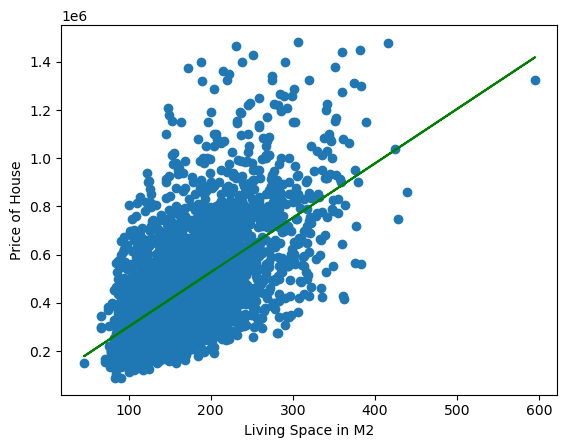

In [213]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_predict2_train, color = 'green')
plt.xlabel('Living Space in M2')
plt.ylabel('Price of House')


In [215]:
score2 = lr.score(x_train,y_train)
score2

0.3551046727538546